In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering, MeanShift, estimate_bandwidth, AffinityPropagation, KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from itertools import cycle

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

### Blob 1 - More and Close

In [6]:
centers = [[1, 1], [-1, -1], [1, -1]]

X1, y1 = make_blobs(
    n_samples=20000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.9,
    random_state=42)

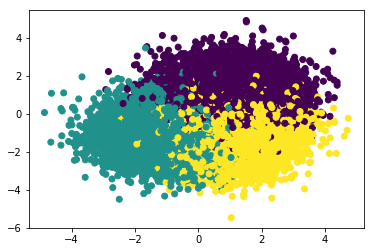

In [16]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

### Blob 2 - Few and Close

In [7]:
centers = [[1, 1], [-1, -1], [1, -1]]

X2, y2 = make_blobs(
    n_samples=2000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

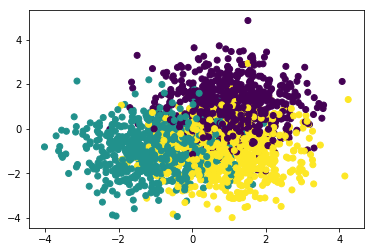

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

### Blob 3 - Few and Far

In [8]:
centers = [[4, 4], [-4, -4], [4, -4]]

X3, y3 = make_blobs(
    n_samples=2000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

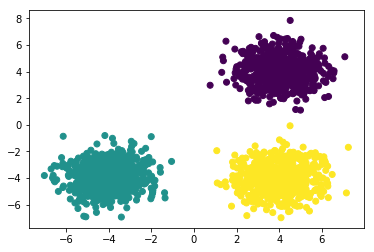

In [18]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.show()

## K-Means

### Blob 1

Number of estimated clusters: 2


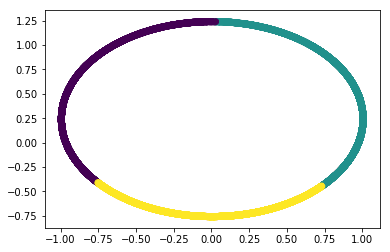

In [78]:
X_norm = normalize(X1)
X_pca = PCA(2).fit_transform(X_norm)
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

### Blob 2

Number of estimated clusters: 2


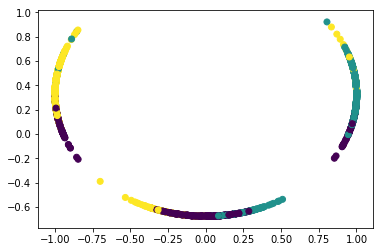

In [82]:
X_norm2 = normalize(X2)
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm2)

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

### Blob 3

Number of estimated clusters: 2


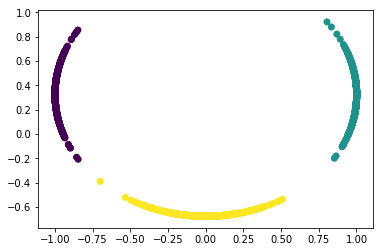

In [83]:
X_norm3 = normalize(X3)
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm3)

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

## Mean Shift

### Blob 1

Number of estimated clusters: 10


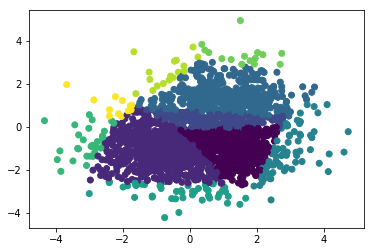

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3   4   5   6   7   8   9
row_0                                            
0       76   29  121  391  17   0   0  15  16   2
1       55  490   33   16   0  26  31   0   2  10
2      341  143   73   35  59  19   0   0   0   0


In [69]:
bandwidth = estimate_bandwidth(X_train1, quantile=0.2, n_samples=10)

ms1 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms1.fit(X_train1)

labels = ms1.labels_

cluster_centers = ms1.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train1[:, 0], X_train1[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,labels))

### Blob 2

Number of estimated clusters: 2


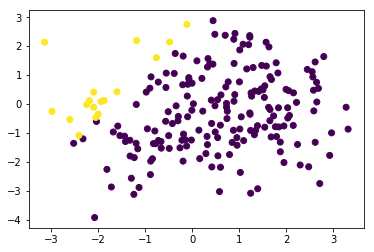

Comparing the assigned categories to the ones in the data:
col_0   0   1
row_0        
0      65   3
1      47  14
2      71   0


In [73]:
bandwidth = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)

ms2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms2.fit(X_train2)

labels = ms2.labels_

cluster_centers = ms2.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,labels))



### Blob 3

Number of estimated clusters: 3


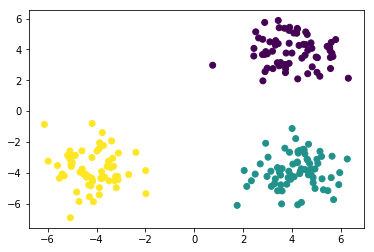

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0      68   0   0
1       0   0  61
2       0  71   0


In [89]:
bandwidth = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)

ms3 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms3.fit(X_train3)

labels = ms3.labels_

cluster_centers = ms3.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train3,labels))

#

## Spectral Clustering

### Blob 1

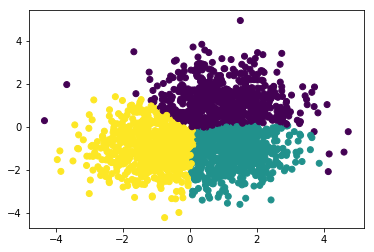

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      528   94   45
1       39   78  546
2       93  468  109


In [32]:
n_clusters=3

sc1 = SpectralClustering(n_clusters=n_clusters)
sc1.fit(X_train1)

predict=sc1.fit_predict(X_train1)

plt.scatter(X_train1[:, 0], X_train1[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,predict))

### Blob 2

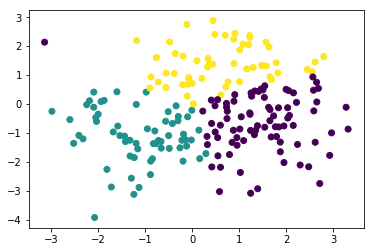

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0      24   4  40
1       4  49   8
2      55  10   6


In [35]:
sc2 = SpectralClustering(n_clusters=n_clusters)
sc2.fit(X_train2)

predict=sc2.fit_predict(X_train2)

plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,predict))

### Blob 3

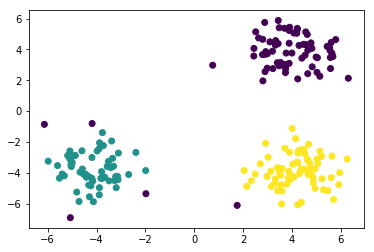

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0      68   0   0
1       4  57   0
2       1   0  70


In [36]:
sc3 = SpectralClustering(n_clusters=n_clusters)
sc3.fit(X_train3)

predict=sc3.fit_predict(X_train3)

plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train3,predict))

## Affinity Propagation

### Blob 1

In [47]:
af1 = AffinityPropagation().fit(X_train1)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af1.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af1.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 274


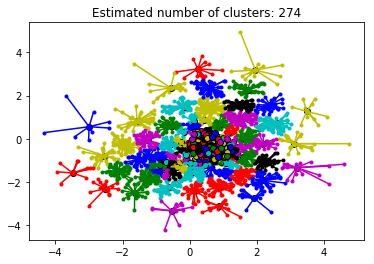

In [48]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train1[cluster_centers_indices[k]]
    plt.plot(X_train1[class_members, 0], X_train1[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train1[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

#This tool the longest time to run, about a minute for both cells

### Blob 2

In [49]:
af2 = AffinityPropagation().fit(X_train2)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af2.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af2.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 14


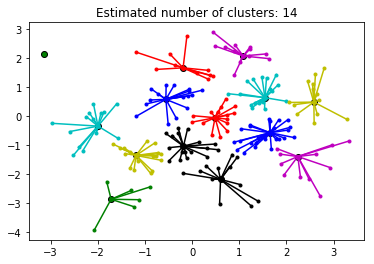

In [50]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train2[cluster_centers_indices[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Blob 3

In [51]:
af3 = AffinityPropagation().fit(X_train3)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af1.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af3.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 274


IndexError: index 205 is out of bounds for axis 0 with size 200

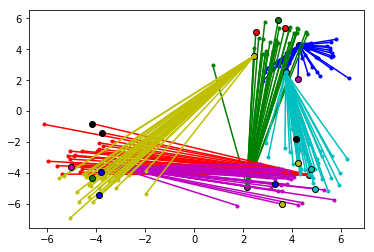

In [52]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train3[cluster_centers_indices[k]]
    plt.plot(X_train3[class_members, 0], X_train3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Conclusion

K-Means:

All three of my K-Means came out in this strange halo configuration with each broken up into the three "clusters" which I had defined for n_clusters, for all three blobs. I re-ran them without the PCA used in the lesson because the blobs did not have more than the two features. The lesson used a dataset with 14 features and then used PCA to decompose it to two. Regardless, none of the three represented anything close to the original blobs I created. 

Mean-Shift

For blob 1, to get anything besides a single cluster I had to set n_samples from 500 to less than 15 but more than 9. And those clusters ranged from 7-15, with trememdous overlap. Blob 2 clustered in this odd configuration for most sampling values, with only two clusters and one clearly containing most. Since we know there are three blobs, this isn't very good either. Blob 3 split off very nicely into the three respective clusters. All three blobs plotted only 10% of the data points created in the blobs. At no point in the model did I set that, so that's odd. I would wish to see all 20,000 and 2,000 of my data points in the plot, partitioned out into their respective clusters. 

Spectral Clustering

Spectral clustering did a really good job of creating the three clusters, displaying all of the data points and with as little overlap as I could have hoped. All three of the plots did a great job with the number and proximity of their data. 

Affinity Propagation

What an ungodly mess. The plots for blob 1 and blob 3 are equally useless, giving hundreds of clusters. Blob 3 couldn't even process the plot entirely as it seems it tried to create more exemplars than there were datapoints. This also seemed to be operating under the assumption that I only wanted 10% of my data plotted. The first one with 274 clusters took significantly longer than the other three models as well as the other two Affinity Propagations. The plot for blob 2 is decidedly cleaner than the other two. But that hardly matters as it still created 14 clusters, which is a common issue for this model. By setting my preference to 10 I tried to dial down the number of clusters. But that produced 200. I altered the range of preference from .001 to 1000 and got 200 clusters every time. An example of this is below. 

Bottom line, it seems like spectral clustering handled the data best when partitioning just three blobs. The others may be better for dealing with large amounts of data. But for sparse data like this SC performed the best. 

Done
Estimated number of clusters: 200


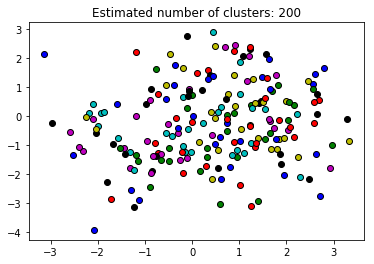

In [101]:
af2 = AffinityPropagation(preference=1000).fit(X_train2)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af2.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af2.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train2[cluster_centers_indices[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()